# basic plot of ADCIRC max water level for NSF-HSEES
##Ensemble member number is set in "ens", and can be iterated over to load all ensemble members.  Note that the ADCIRC grid does not change between ensemble members, and so the part that gets the lon, lat, elements can be done once.  

## exercise:  make a plot (template below) of the MOM for this Experiment.  I.e., the max across all maxes for the ensembles 1-21.

In [2]:
from pylab import *

import matplotlib.tri as Tri
import netCDF4
import datetime
import time
import sys
%matplotlib inline

In [3]:
#  this is the THREDDS url to the Isabel Experiment #1, ensemble 01.  
def getURL (ensemble):
    url_base='http://opendap.renci.org:1935/thredds/dodsC/Experiments/Isabel_ex1/ADCIRC/12km/n%02d/maxele.63.nc'
    url=url_base % ensemble
    return url

In [13]:
# get ADCIRC grid parts;  this need ony be done once, as it can be tome-comsuming over the network
url=getURL(1)
nc=netCDF4.Dataset(url)
print nc.variables.keys()
lon = nc.variables['x'][:]
lat = nc.variables['y'][:]
nv = nc.variables['element'][:,:] -1
tri = Tri.Triangulation(lon,lat, triangles=nv)
latmin = np.mean(lat)  # needed for scaling lon/lat plots
print tri
print tri.x.shape
print lon.shape

[u'time', u'x', u'y', u'element', u'adcirc_mesh', u'neta', u'nvdll', u'max_nvdll', u'ibtypee', u'nbdv', u'nvel', u'nvell', u'max_nvell', u'ibtype', u'nbvv', u'depth', u'zeta_max', u'time_of_zeta_max']
(624782,)
(624782,)


In [18]:
# This gets the data associated with the variable;  
# this part should be looped over to load the sequence of ensembles; 
# this means looping over ens=1:21 and building the url each time.
vname='zeta_max'
var = nc.variables[vname]
var_d=var[:]
mom=np.zeros(var_d.shape)
mom[:]=np.nan

size = 22  #  number of ens members

for ens in range(0,size-1):
    url = getURL(ens+1)
    nc=netCDF4.Dataset(url)  # get new nc object for each ens
    var = nc.variables[vname]
    var_d=var[:]
    print 'Ensemble ' + str(ens) + ' : ' + url
    c=np.column_stack((mom,np.squeeze(var_d)))
    mom=np.nanmax(c,axis=1)

Ensemble 0 : http://opendap.renci.org:1935/thredds/dodsC/Experiments/Isabel_ex1/ADCIRC/12km/n01/maxele.63.nc
Ensemble 1 : http://opendap.renci.org:1935/thredds/dodsC/Experiments/Isabel_ex1/ADCIRC/12km/n02/maxele.63.nc
Ensemble 2 : http://opendap.renci.org:1935/thredds/dodsC/Experiments/Isabel_ex1/ADCIRC/12km/n03/maxele.63.nc
Ensemble 3 : http://opendap.renci.org:1935/thredds/dodsC/Experiments/Isabel_ex1/ADCIRC/12km/n04/maxele.63.nc
Ensemble 4 : http://opendap.renci.org:1935/thredds/dodsC/Experiments/Isabel_ex1/ADCIRC/12km/n05/maxele.63.nc
Ensemble 5 : http://opendap.renci.org:1935/thredds/dodsC/Experiments/Isabel_ex1/ADCIRC/12km/n06/maxele.63.nc
Ensemble 6 : http://opendap.renci.org:1935/thredds/dodsC/Experiments/Isabel_ex1/ADCIRC/12km/n07/maxele.63.nc
Ensemble 7 : http://opendap.renci.org:1935/thredds/dodsC/Experiments/Isabel_ex1/ADCIRC/12km/n08/maxele.63.nc
Ensemble 8 : http://opendap.renci.org:1935/thredds/dodsC/Experiments/Isabel_ex1/ADCIRC/12km/n09/maxele.63.nc
Ensemble 9 : http:/

In [19]:
#mom=np.transpose(mom)
#mom=np.squeeze(mom)

#mom=where(mom<-999, mom, nan)
#mom[mom<-999]=np.nan

print 'Maximum in Mom array : ' + str(np.nanmax(mom))
print 'Minimum in Mom array : ' + str(np.nanmin(mom))
vmax=np.ceil(np.nanmax(mom))
print mom[875],mom[876], vmax

Maximum in Mom array : 13.3174906038
Minimum in Mom array : -99999.0
3.37175377053 3.49192753027 14.0


Making contours in figure ...
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.]
13.3174906038
(624782,)
Calling tricontourf  ...


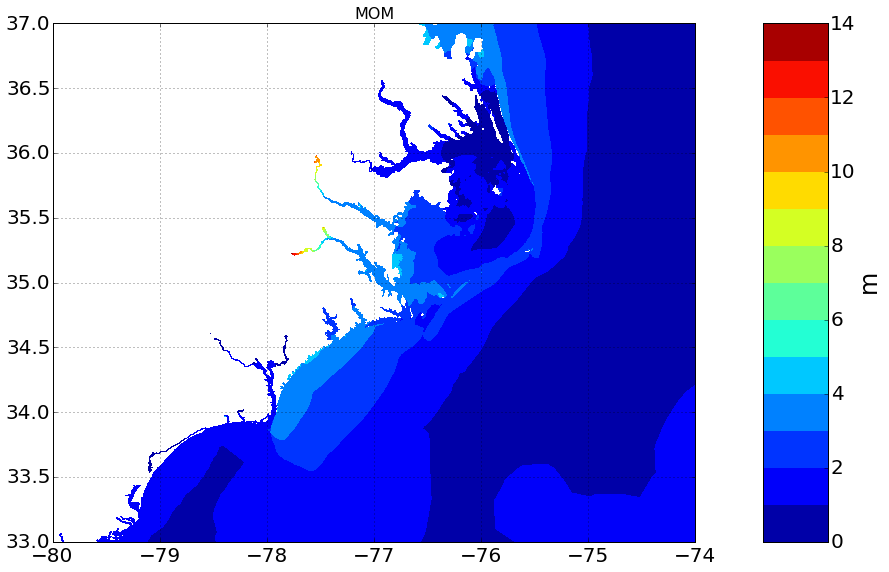

In [20]:
print 'Making contours in figure ...'
fig = plt.figure(figsize=(18,9), dpi=144)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) 
ax.set_aspect(1.0/np.cos(latmin * np.pi / 180.0))

levels = linspace(0.,vmax,vmax+1)
print levels
print np.nanmax(mom)
print mom.shape

print 'Calling tricontourf  ...'
contour = tricontourf(tri, mom,levels=levels,shading='faceted')
plt.grid(True)
plt.xlim((-80,-74))
plt.ylim((33,37))
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('MOM', fontsize=16)

# add colorbar
cbax = fig.add_axes([0.80, 0.1, 0.05, 0.8]) 
cb = plt.colorbar(contour, cax=cbax,  orientation='vertical')
cb.set_label(var.units, fontsize=24)
cb.ax.tick_params(axis='both', which='major', labelsize=20)